Dataset: https://www.kaggle.com/maksonvinicio/green-house-gases-analysis

First, let's start by importing the libraries that we will use for the analysis and manipulations.


In [2]:
cd drive/MyDrive/MLProjects/GreenHouse-Gas/

/content/drive/MyDrive/MLProjects/GreenHouse-Gas


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import os
%matplotlib inline

# 1. Loading and preparing data¶

In [4]:
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Untitled0.ipynb
./data/emission_data.csv


In [5]:
data = pd.read_csv('data/emission_data.csv')

In [6]:
data.head()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,...,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.782164e+07,3.005654e+07,3.181356e+07,3.379293e+07,3.588847e+07,3.840856e+07,4.123098e+07,4.473287e+07,4.786695e+07,5.098111e+07,5.383819e+07,5.660308e+07,5.920548e+07,6.163197e+07,6.301349e+07,6.434733e+07,6.562982e+07,6.686096e+07,6.802609e+07,6.911057e+07,7.014003e+07,7.094960e+07,7.171779e+07,7.252987e+07,7.359394e+07,7.478101e+07,7.572247e+07,7.704272e+07,7.868596e+07,8.095431e+07,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.400307e+09,8.899346e+09,9.435009e+09,9.983550e+09,1.055523e+10,1.114971e+10,1.179892e+10,1.246457e+10,1.315416e+10,1.384374e+10,1.456834e+10,1.526609e+10,1.592394e+10,1.661079e+10,1.728035e+10,1.798989e+10,1.871012e+10,1.948563e+10,2.027921e+10,2.109189e+10,2.192722e+10,2.275555e+10,2.364008e+10,2.451920e+10,2.540335e+10,2.636533e+10,2.739842e+10,2.844249e+10,2.952629e+10,3.065262e+10,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8.448451e+07,9.206533e+07,9.723157e+07,1.045669e+08,1.118692e+08,1.194940e+08,1.273130e+08,1.351869e+08,1.432368e+08,1.506747e+08,1.579953e+08,1.669721e+08,1.724828e+08,1.767660e+08,1.792795e+08,1.816135e+08,1.835371e+08,1.856219e+08,1.876371e+08,1.891796e+08,1.909310e+08,1.939135e+08,1.969327e+08,2.001533e+08,2.039016e+08,2.081921e+08,2.123544e+08,2.166047e+08,2.204995e+08,2.244237e+08,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4.335912e+08,4.791368e+08,5.455532e+08,5.918952e+08,6.310683e+08,6.835722e+08,7.545187e+08,8.271278e+08,9.032082e+08,9.870917e+08,1.070800e+09,1.150608e+09,1.227345e+09,1.306150e+09,1.386032e+09,1.467974e+09,1.554121e+09,1.649103e+09,1.745889e+09,1.832893e+09,1.939514e+09,2.031182e+09,2.118625e+09,2.202405e+09,2.291812e+09,2.382860e+09,2.470713e+09,2.577187e+09,2.677388e+09,2.785788e+09,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3664,7328,10992,14656,18320,...,2.797757e+10,2.925538e+10,3.057520e+10,3.187242e+10,3.317816e+10,3.443667e+10,3.572645e+10,3.703954e+10,3.835471e+10,3.974110e+10,4.117512e+10,4.267617e+10,4.413932e+10,4.561030e+10,4.711421e+10,4.865687e+10,5.025363e+10,5.187321e+10,5.356143e+10,5.532837e+10,5.717722e+10,5.906757e+10,6.097459e+10,6.290508e+10,6.485794e+10,6.686192e+10,6.887383e+10,7.095078e+10,7.306565e+10,7.523367e+10,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [7]:
print(data.shape)

(231, 268)


In [8]:
print(data.columns)

Index(['Country', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object', length=268)


We can observe that we have data from 268 countries, since 1751, but in this analysis we will look at the last 20 years, which is where the greatest amount of emission is concentrated.

In [9]:
columns = ['Country', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017']

In [10]:
df = data[columns]

In [11]:
df.columns

Index(['Country', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')

# 2. Descriptive Statistics

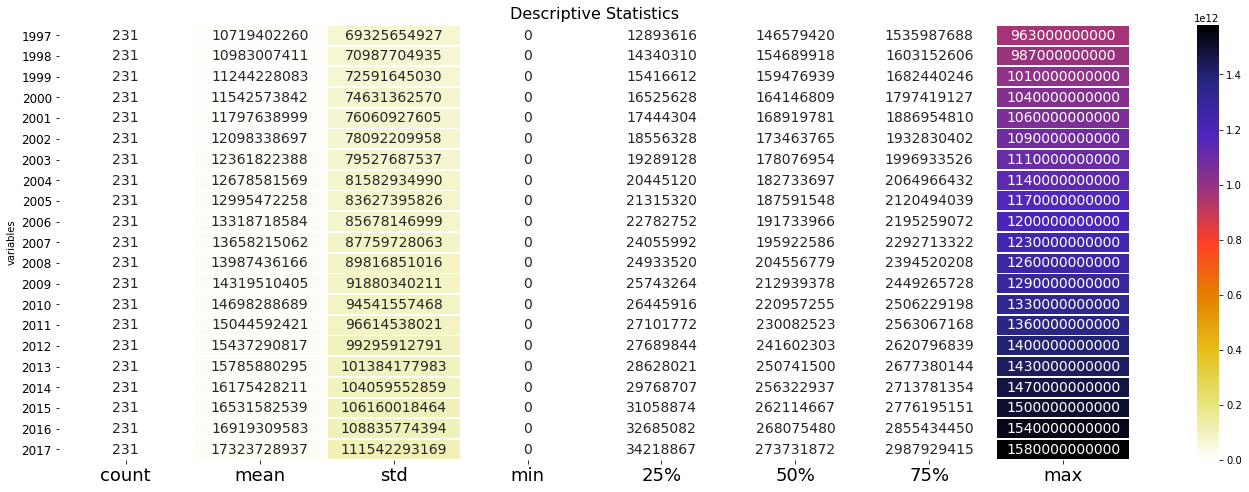

In [18]:
desc = df.describe().T

f, ax = plt.subplots(figsize=(24,8))
sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='.00f', 
            ax=ax, linewidths=0.8, cbar=True, annot_kws={'size':14})

plt.xticks(size=18)
plt.yticks(size=12, rotation=0)
plt.ylabel("variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

With the analysis of the average, it can be seen that each year there has been a gradual increase in pollutant emissions.


Check for null values ​​in the data

In [19]:
df.isna().sum()

Country    0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  231 non-null    object 
 1   1997     231 non-null    float64
 2   1998     231 non-null    float64
 3   1999     231 non-null    float64
 4   2000     231 non-null    float64
 5   2001     231 non-null    float64
 6   2002     231 non-null    float64
 7   2003     231 non-null    float64
 8   2004     231 non-null    float64
 9   2005     231 non-null    float64
 10  2006     231 non-null    float64
 11  2007     231 non-null    float64
 12  2008     231 non-null    float64
 13  2009     231 non-null    float64
 14  2010     231 non-null    float64
 15  2011     231 non-null    float64
 16  2012     231 non-null    float64
 17  2013     231 non-null    float64
 18  2014     231 non-null    float64
 19  2015     231 non-null    float64
 20  2016     231 non-null    float64
 21  2017     231 non

In [21]:
df['total_emission'] = df.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df[['Country', 'total_emission']].head()

,Country,total_emission
0,Afghanistan,2.102261e+09
1,Africa,6.553018e+11
2,Albania,4.772169e+09
3,Algeria,6.002802e+10
4,Americas (other),1.594007e+12


# 3. Analysis top ten economies

In [23]:
top = df.sort_values(by='total_emission', ascending=False)

In [24]:
top.head(11)

,Country,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,total_emission
227,World,9.630000e+11,9.870000e+11,1.010000e+12,1.040000e+12,1.060000e+12,1.090000e+12,1.110000e+12,1.140000e+12,1.170000e+12,1.200000e+12,1.230000e+12,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12,2.616000e+13
220,United States,2.840000e+11,2.900000e+11,2.960000e+11,3.020000e+11,3.080000e+11,3.140000e+11,3.200000e+11,3.260000e+11,3.320000e+11,3.380000e+11,3.440000e+11,3.500000e+11,3.560000e+11,3.610000e+11,3.670000e+11,3.720000e+11,3.780000e+11,3.830000e+11,3.890000e+11,3.940000e+11,3.990000e+11,7.203000e+12
64,EU-28,2.730000e+11,2.770000e+11,2.810000e+11,2.860000e+11,2.900000e+11,2.940000e+11,2.980000e+11,3.030000e+11,3.070000e+11,3.110000e+11,3.160000e+11,3.200000e+11,3.240000e+11,3.280000e+11,3.310000e+11,3.350000e+11,3.390000e+11,3.420000e+11,3.460000e+11,3.490000e+11,3.530000e+11,6.603000e+12
72,Europe (other),1.150000e+11,1.170000e+11,1.190000e+11,1.210000e+11,1.230000e+11,1.250000e+11,1.270000e+11,1.290000e+11,1.310000e+11,1.330000e+11,1.360000e+11,1.380000e+11,1.400000e+11,1.420000e+11,1.440000e+11,1.470000e+11,1.490000e+11,1.510000e+11,1.530000e+11,1.550000e+11,1.580000e+11,2.853000e+12
13,Asia and Pacific (other),9.176161e+10,9.514275e+10,9.863758e+10,1.020000e+11,1.060000e+11,1.100000e+11,1.140000e+11,1.180000e+11,1.220000e+11,1.260000e+11,1.310000e+11,1.350000e+11,1.390000e+11,1.440000e+11,1.490000e+11,1.540000e+11,1.580000e+11,1.630000e+11,1.680000e+11,1.730000e+11,1.780000e+11,2.775542e+12
45,China,6.293247e+10,6.619838e+10,6.945651e+10,7.280581e+10,7.623195e+10,8.001439e+10,8.446670e+10,8.959260e+10,9.536376e+10,1.020000e+11,1.090000e+11,1.160000e+11,1.240000e+11,1.320000e+11,1.420000e+11,1.510000e+11,1.610000e+11,1.710000e+11,1.810000e+11,1.900000e+11,2.000000e+11,2.476063e+12
172,Russia,6.829188e+10,6.977673e+10,7.128972e+10,7.278933e+10,7.432758e+10,7.585654e+10,7.741901e+10,7.898988e+10,8.057854e+10,8.222720e+10,8.387493e+10,8.555472e+10,8.712716e+10,8.878472e+10,9.049715e+10,9.222324e+10,9.388923e+10,9.555634e+10,9.722824e+10,9.889631e+10,1.010000e+11,1.766178e+12
83,Germany,7.350837e+10,7.443277e+10,7.532965e+10,7.623061e+10,7.714809e+10,7.804904e+10,7.895101e+10,7.983901e+10,8.070623e+10,8.158498e+10,8.243708e+10,8.329150e+10,8.408146e+10,8.491515e+10,8.572595e+10,8.654115e+10,8.737379e+10,8.816743e+10,8.896450e+10,8.976626e+10,9.056563e+10,1.727610e+12
4,Americas (other),5.532837e+10,5.717722e+10,5.906757e+10,6.097459e+10,6.290508e+10,6.485794e+10,6.686192e+10,6.887383e+10,7.095078e+10,7.306565e+10,7.523367e+10,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10,1.594007e+12
219,United Kingdom,6.676676e+10,6.733425e+10,6.789475e+10,6.846181e+10,6.903774e+10,6.959778e+10,7.016938e+10,7.074259e+10,7.131259e+10,7.188024e+10,7.243956e+10,7.298441e+10,7.347902e+10,7.399123e+10,7.446104e+10,7.494871e+10,7.542644e+10,7.586514e+10,7.628780e+10,7.668635e+10,7.707106e+10,1.516839e+12


In the last 20 years (1997 to 2017) the largest emissions came from countries that grew the most in proportion to GDP, with the United States leading the ranking.


In [25]:
top = top.drop(index=[227,64,72,13,4,138,1], axis=0)

In [26]:
df_economies = top.head(10)


Adding Brazil to Analysis

In [27]:
brazil = top[top['Country'] == 'Brazil']

In [28]:
df_economies = pd.concat([df_economies, brazil])


Analyzing which countries pollute the most

In [29]:
df_economies.columns

Index(['Country', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', 'total_emission'],
      dtype='object')


Analysis of the total emission feature in relation to the world's largest economies

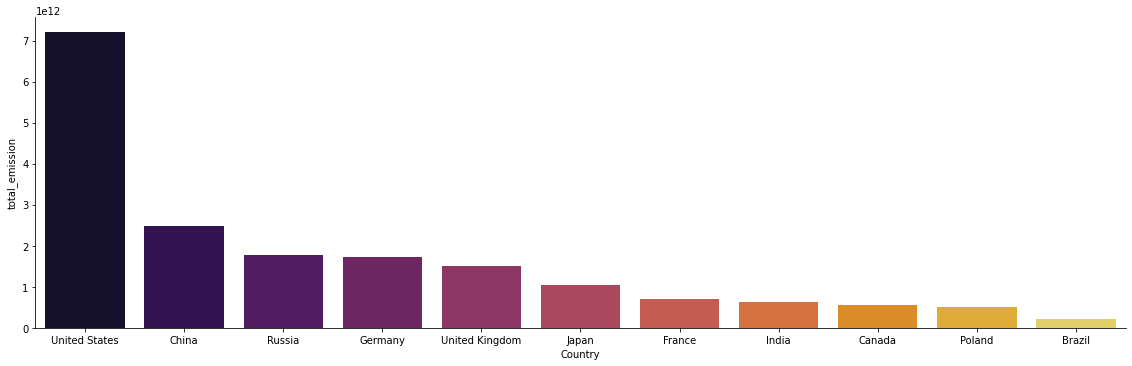

In [34]:
sns.catplot(x='Country', y='total_emission', data=df_economies, kind='bar', height=5, aspect=25/8, palette='inferno')

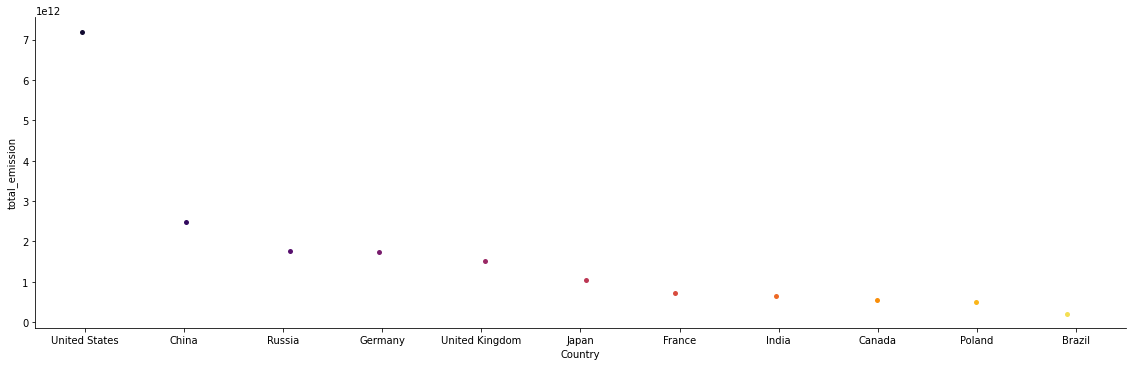

In [31]:
sns.catplot(x='Country', y='total_emission', data=df_economies, height=5, aspect=25/8, palette='inferno')

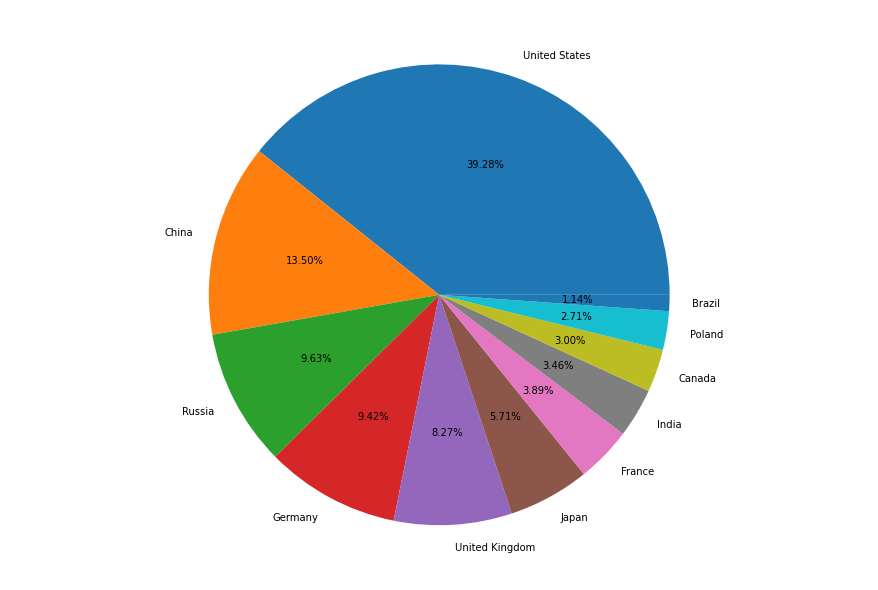

In [39]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.axis('equal')
ax.pie(df_economies['total_emission'], labels = df_economies["Country"], autopct='%1.2f%%')
plt.show()


Based on the above analyses, we can see that the United States leads by leaps and bounds in total emissions, being approximately 2.5x larger than China, with china being approximately 3x larger in population


Based on this information, we should analyze the ratio of emissions by number of inhabitants, right?

In [40]:
df_habit = pd.DataFrame()
df_habit = df_economies['total_emission'].iloc[0:2]

Population China 2017: 1.386 billion


Population EUA 2017: 325.1 million

In [41]:
emission_eua = df_habit.iloc[0] / int(326e6)
emission_china = df_habit.iloc[1] / int(1.386e9)

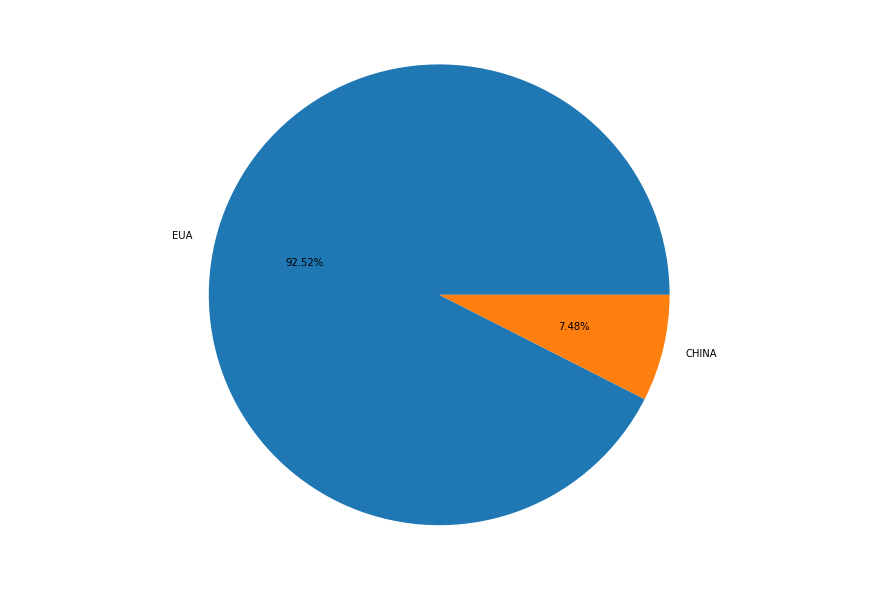

In [42]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.axis('equal')
ax.pie([emission_eua, emission_china], labels=['EUA', 'CHINA'], autopct='%1.2f%%')
plt.show()

We can conclude with this analysis, that each American emits 92.52% more than a Chinese, this reflects the great growth of the USA in recent years...


In the last 20 years...


We can see from the table above that there are economies that grow a lot, but they don't even appear in the top 11 of the biggest emitters, like Canada and South Korea, which are examples of countries in environmental issues.

In comparison, the United States and China account for the vast majority of emissions in the world, with the United States leading the way by leaps and bounds


Brazil, on the other hand, is balanced with its relevant position in the economies, 11th largest emitter and 12th largest economy in 2020

Analyzing the countries with the largest population¶

In [43]:
df_economies

,Country,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,total_emission
220,United States,2.840000e+11,2.900000e+11,2.960000e+11,3.020000e+11,3.080000e+11,3.140000e+11,3.200000e+11,3.260000e+11,3.320000e+11,3.380000e+11,3.440000e+11,3.500000e+11,3.560000e+11,3.610000e+11,3.670000e+11,3.720000e+11,3.780000e+11,3.830000e+11,3.890000e+11,3.940000e+11,3.990000e+11,7.203000e+12
45,China,6.293247e+10,6.619838e+10,6.945651e+10,7.280581e+10,7.623195e+10,8.001439e+10,8.446670e+10,8.959260e+10,9.536376e+10,1.020000e+11,1.090000e+11,1.160000e+11,1.240000e+11,1.320000e+11,1.420000e+11,1.510000e+11,1.610000e+11,1.710000e+11,1.810000e+11,1.900000e+11,2.000000e+11,2.476063e+12
172,Russia,6.829188e+10,6.977673e+10,7.128972e+10,7.278933e+10,7.432758e+10,7.585654e+10,7.741901e+10,7.898988e+10,8.057854e+10,8.222720e+10,8.387493e+10,8.555472e+10,8.712716e+10,8.878472e+10,9.049715e+10,9.222324e+10,9.388923e+10,9.555634e+10,9.722824e+10,9.889631e+10,1.010000e+11,1.766178e+12
83,Germany,7.350837e+10,7.443277e+10,7.532965e+10,7.623061e+10,7.714809e+10,7.804904e+10,7.895101e+10,7.983901e+10,8.070623e+10,8.158498e+10,8.243708e+10,8.329150e+10,8.408146e+10,8.491515e+10,8.572595e+10,8.654115e+10,8.737379e+10,8.816743e+10,8.896450e+10,8.976626e+10,9.056563e+10,1.727610e+12
219,United Kingdom,6.676676e+10,6.733425e+10,6.789475e+10,6.846181e+10,6.903774e+10,6.959778e+10,7.016938e+10,7.074259e+10,7.131259e+10,7.188024e+10,7.243956e+10,7.298441e+10,7.347902e+10,7.399123e+10,7.446104e+10,7.494871e+10,7.542644e+10,7.586514e+10,7.628780e+10,7.668635e+10,7.707106e+10,1.516839e+12
107,Japan,3.728224e+10,3.848595e+10,3.972579e+10,4.098852e+10,4.223661e+10,4.351385e+10,4.479923e+10,4.607927e+10,4.736612e+10,4.862876e+10,4.992882e+10,5.115806e+10,5.231826e+10,5.352984e+10,5.479124e+10,5.609332e+10,5.740739e+10,5.867156e+10,5.989523e+10,6.109955e+10,6.230461e+10,1.046304e+12
77,France,2.980965e+10,3.023944e+10,3.066511e+10,3.108577e+10,3.151165e+10,3.193257e+10,3.236057e+10,3.278950e+10,3.322214e+10,3.364424e+10,3.405714e+10,3.446393e+10,3.485087e+10,3.524877e+10,3.562156e+10,3.599568e+10,3.636993e+10,3.671351e+10,3.706167e+10,3.741177e+10,3.776808e+10,7.128235e+11
99,India,1.729614e+10,1.822969e+10,1.922492e+10,2.025456e+10,2.129020e+10,2.233779e+10,2.342967e+10,2.457521e+10,2.578536e+10,2.707251e+10,2.846276e+10,3.001075e+10,3.173087e+10,3.343090e+10,3.524807e+10,3.723183e+10,3.922971e+10,4.143724e+10,4.371365e+10,4.609110e+10,4.855786e+10,6.346408e+11
39,Canada,2.057765e+10,2.111188e+10,2.166193e+10,2.223446e+10,2.279909e+10,2.336998e+10,2.395758e+10,2.454341e+10,2.512021e+10,2.569070e+10,2.628484e+10,2.685964e+10,2.740016e+10,2.795562e+10,2.851640e+10,2.908007e+10,2.964897e+10,3.021697e+10,3.078255e+10,3.134074e+10,3.191352e+10,5.510664e+11
167,Poland,2.039928e+10,2.073662e+10,2.106428e+10,2.138137e+10,2.169492e+10,2.200065e+10,2.231907e+10,2.264160e+10,2.296327e+10,2.329790e+10,2.363226e+10,2.395971e+10,2.427385e+10,2.460599e+10,2.493768e+10,2.526190e+10,2.558181e+10,2.588936e+10,2.619998e+10,2.652221e+10,2.684882e+10,4.962125e+11


Slicing data into the three most populous countries in the world, the US, China, and India.

In [44]:
usa   = df_economies.loc[(df_economies['Country'] == 'United States'), 'total_emission'].iloc[0]
china = df_economies.loc[(df_economies['Country'] == 'China'), 'total_emission'].iloc[0]
india = df_economies.loc[(df_economies['Country'] == 'India'), 'total_emission'].iloc[0]

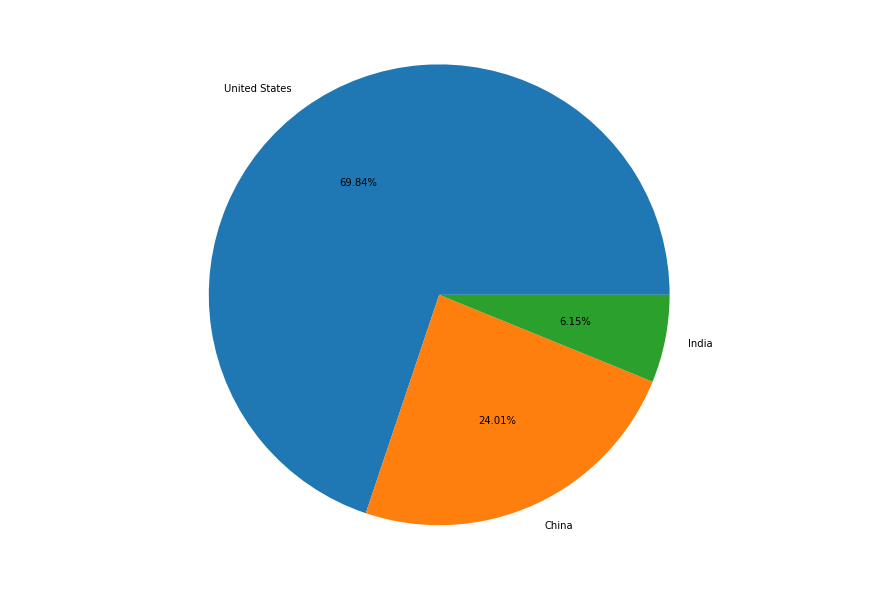

In [45]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.axis('equal')
plt.pie([usa, china, india], labels = ['United States', 'China', 'India'], autopct='%1.2f%%')
plt.show()

We can conclude that India is the most populous, and the one that emits the least CO2, but this is very much associated with its economic development, where the country really started to grow production and emissions in the mid-1980s, while the US mainly already became the largest economy in the world in the mid-1920s, after the first world war.

# 4. Forecast analysis top economies

In [46]:
df_economies['Country']

220     United States
45              China
172            Russia
83            Germany
219    United Kingdom
107             Japan
77             France
99              India
39             Canada
167            Poland
31             Brazil
Name: Country, dtype: object

In [47]:
df1 = df_economies.drop('total_emission', axis=1)

In [48]:
df = df1.T
df = df.reset_index()

In [50]:
df.columns = df.iloc[0]
df = df.rename(columns = {'Country':'year'})
df = df.drop(0)

In [51]:
df

,year,United States,China,Russia,Germany,United Kingdom,Japan,France,India,Canada,Poland,Brazil
1,1997,2.84e+11,6.29325e+10,6.82919e+10,7.35084e+10,6.67668e+10,3.72822e+10,2.98096e+10,1.72961e+10,2.05776e+10,2.03993e+10,6.37259e+09
2,1998,2.9e+11,6.61984e+10,6.97767e+10,7.44328e+10,6.73342e+10,3.84859e+10,3.02394e+10,1.82297e+10,2.11119e+10,2.07366e+10,6.6809e+09
3,1999,2.96e+11,6.94565e+10,7.12897e+10,7.53297e+10,6.78948e+10,3.97258e+10,3.06651e+10,1.92249e+10,2.16619e+10,2.10643e+10,6.99718e+09
4,2000,3.02e+11,7.28058e+10,7.27893e+10,7.62306e+10,6.84618e+10,4.09885e+10,3.10858e+10,2.02546e+10,2.22345e+10,2.13814e+10,7.3214e+09
5,2001,3.08e+11,7.6232e+10,7.43276e+10,7.71481e+10,6.90377e+10,4.22366e+10,3.15116e+10,2.12902e+10,2.27991e+10,2.16949e+10,7.65439e+09
6,2002,3.14e+11,8.00144e+10,7.58565e+10,7.8049e+10,6.95978e+10,4.35138e+10,3.19326e+10,2.23378e+10,2.337e+10,2.20006e+10,7.98183e+09
7,2003,3.2e+11,8.44667e+10,7.7419e+10,7.8951e+10,7.01694e+10,4.47992e+10,3.23606e+10,2.34297e+10,2.39576e+10,2.23191e+10,8.29933e+09
8,2004,3.26e+11,8.95926e+10,7.89899e+10,7.9839e+10,7.07426e+10,4.60793e+10,3.27895e+10,2.45752e+10,2.45434e+10,2.26416e+10,8.63301e+09
9,2005,3.32e+11,9.53638e+10,8.05785e+10,8.07062e+10,7.13126e+10,4.73661e+10,3.32221e+10,2.57854e+10,2.51202e+10,2.29633e+10,8.9751e+09
10,2006,3.38e+11,1.02e+11,8.22272e+10,8.1585e+10,7.18802e+10,4.86288e+10,3.36442e+10,2.70725e+10,2.56907e+10,2.32979e+10,9.31704e+09


In [52]:
df = df.astype('float')
df['year'] = df['year'].astype('int')

In [53]:
df.head()

,year,United States,China,Russia,Germany,United Kingdom,Japan,France,India,Canada,Poland,Brazil
1,1997,2.840000e+11,6.293247e+10,6.829188e+10,7.350837e+10,6.676676e+10,3.728224e+10,2.980965e+10,1.729614e+10,2.057765e+10,2.039928e+10,6.372590e+09
2,1998,2.900000e+11,6.619838e+10,6.977673e+10,7.443277e+10,6.733425e+10,3.848595e+10,3.023944e+10,1.822969e+10,2.111188e+10,2.073662e+10,6.680896e+09
3,1999,2.960000e+11,6.945651e+10,7.128972e+10,7.532965e+10,6.789475e+10,3.972579e+10,3.066511e+10,1.922492e+10,2.166193e+10,2.106428e+10,6.997178e+09
4,2000,3.020000e+11,7.280581e+10,7.278933e+10,7.623061e+10,6.846181e+10,4.098852e+10,3.108577e+10,2.025456e+10,2.223446e+10,2.138137e+10,7.321404e+09
5,2001,3.080000e+11,7.623195e+10,7.432758e+10,7.714809e+10,6.903774e+10,4.223661e+10,3.151165e+10,2.129020e+10,2.279909e+10,2.169492e+10,7.654391e+09


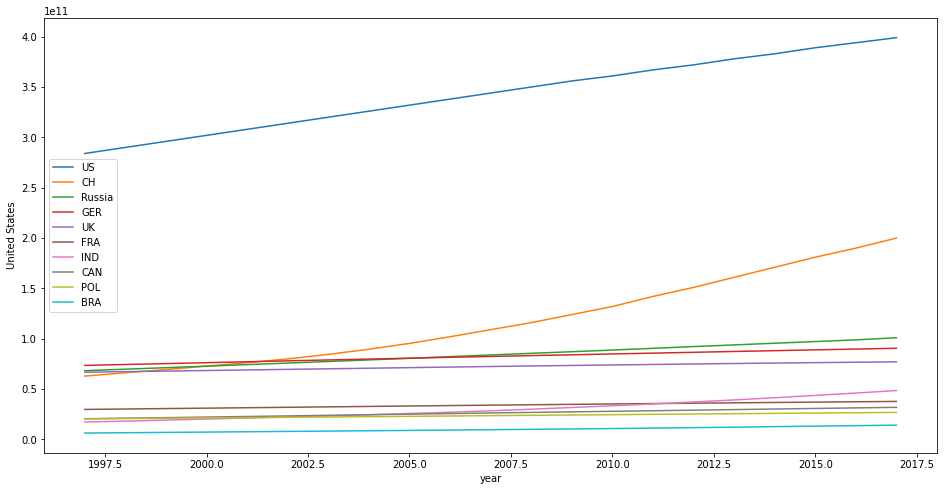

In [54]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='United States', data=df, label = 'US')
sns.lineplot(x='year', y='China', data=df, label = 'CH')
sns.lineplot(x='year', y='Russia', data=df, label = 'Russia')
sns.lineplot(x='year', y='Germany', data=df, label = 'GER')
sns.lineplot(x='year', y='United Kingdom', data=df, label = 'UK')
sns.lineplot(x='year', y='France', data=df, label = 'FRA')
sns.lineplot(x='year', y='India', data=df, label = 'IND')
sns.lineplot(x='year', y='Canada', data=df, label = 'CAN')
sns.lineplot(x='year', y='Poland', data=df, label = 'POL')
sns.lineplot(x='year', y='Brazil', data=df, label = 'BRA')
plt.show()

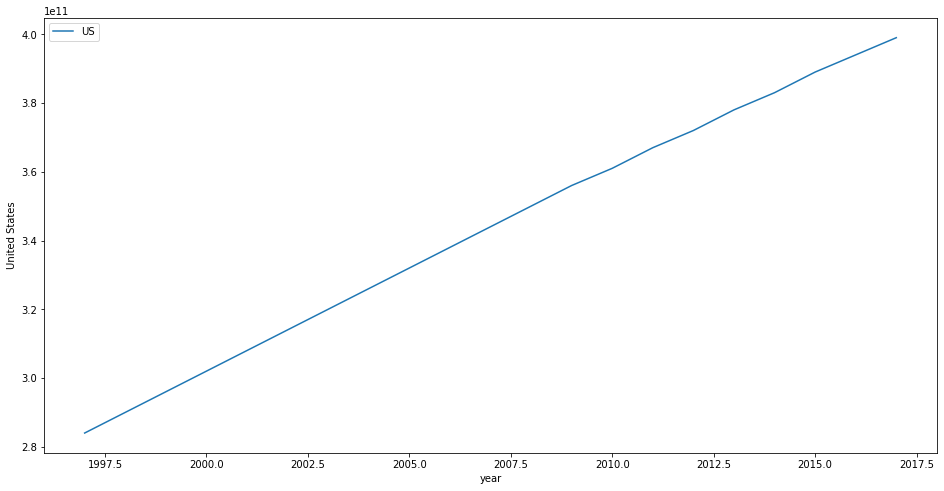

In [55]:
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='United States', data=df, label = 'US')